STEP 1: LOCATING UPLOADED FILES

Files available in /content directory:
- .config
- 10. Market Basket Analysis (1).csv
- 10. Market Basket Analysis.csv
- drive
- sample_data

Using CSV file: 10. Market Basket Analysis (1).csv

STEP 2: DATA LOADING

Aisle data loaded successfully. First 5 rows:
   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation

STEP 3: GENERATING SYNTHETIC TRANSACTIONS

Generating transactions with realistic shopping patterns...

Generated 1000 synthetic transactions with:
- 10 built-in shopping patterns
- Random transactions to simulate variety

STEP 4: MARKET BASKET ANALYSIS

Preparing data for analysis...

Finding frequent itemsets with min_support=0.03...

Top 10 frequent itemsets:
    support             itemsets
55    0.131               (milk)
17    0.088             (cereal)


<ipython-input-12-07d6fc93f506>:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lift', y='rule', data=top_rules, palette='viridis')


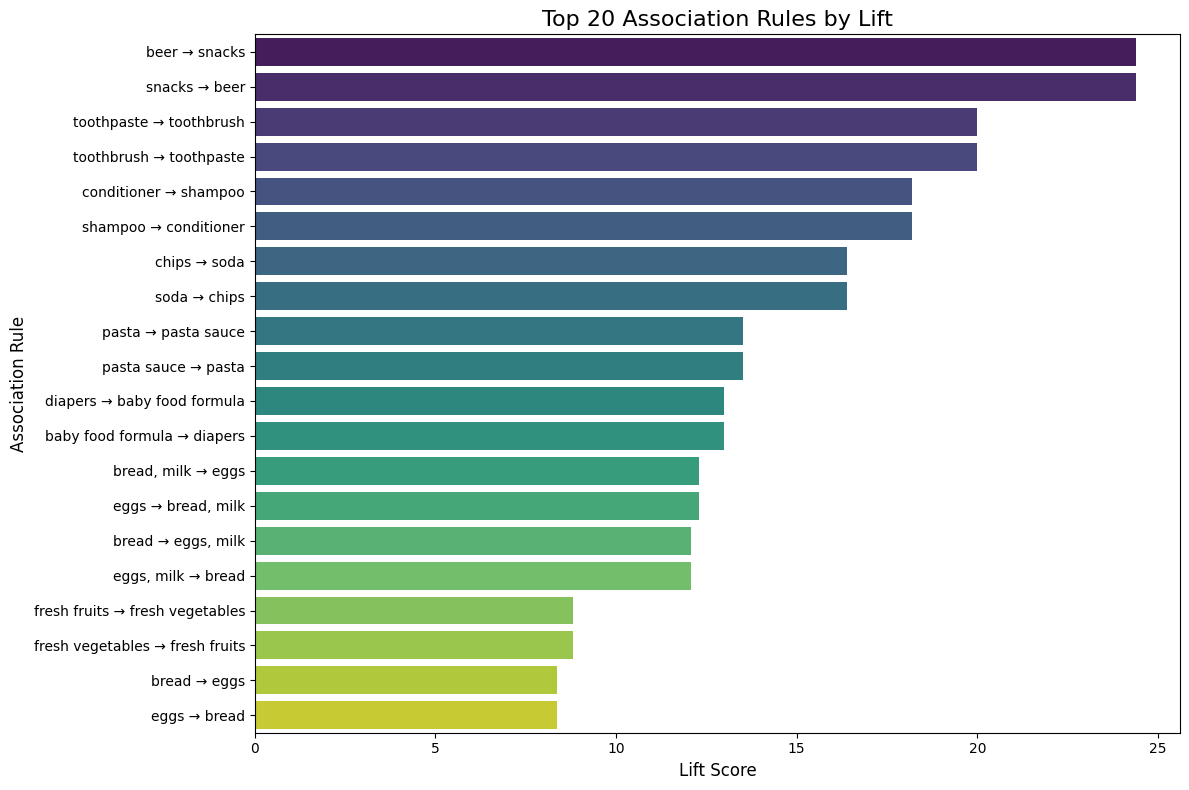

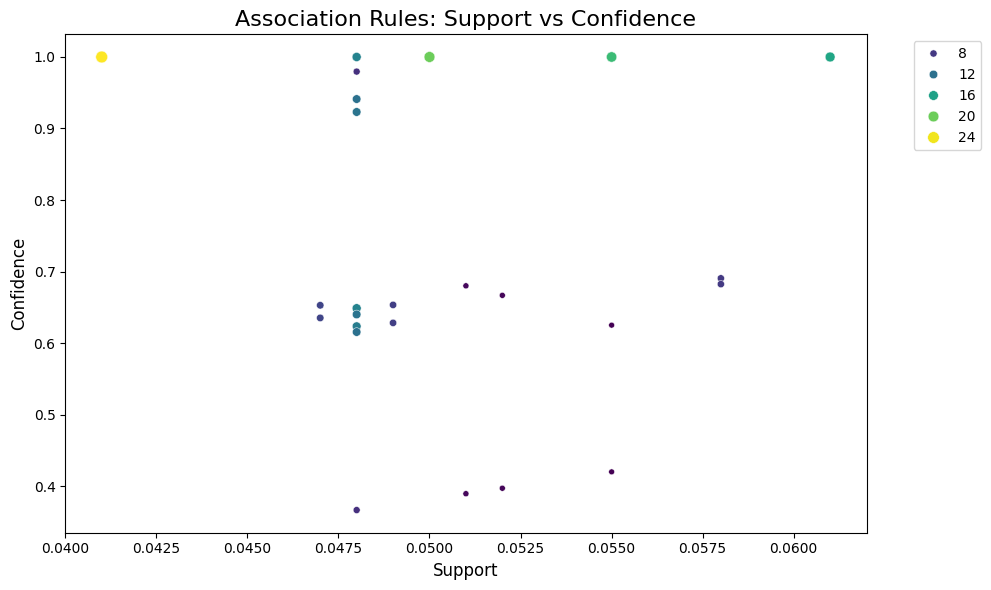


STEP 6: MARKETING INSIGHTS

Found 26 strong association rules:

--------------------------------------------------
RULE: When customers buy ['beer'], they also buy ['snacks']

METRICS:
- Support:    0.041 (Frequency of this combination)
- Confidence: 1.000 (Probability of consequent given antecedent)
- Lift:       24.390 (Strength of association)

MARKETING RECOMMENDATIONS:
1. Product Placement: Place these items near each other
2. Bundling: Create special bundle offers
3. Promotions: Offer discounts on consequent when antecedent is purchased
4. Recommendations: Suggest these items together online

--------------------------------------------------
RULE: When customers buy ['snacks'], they also buy ['beer']

METRICS:
- Support:    0.041 (Frequency of this combination)
- Confidence: 1.000 (Probability of consequent given antecedent)
- Lift:       24.390 (Strength of association)

MARKETING RECOMMENDATIONS:
1. Product Placement: Place these items near each other
2. Bundling: Create spec

In [12]:
# Market Basket Analysis with Association Rule Mining
# Using already uploaded files in Colab environment

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# ----------------------------
# STEP 1: Locate Uploaded Files
# ----------------------------
print("="*50)
print("STEP 1: LOCATING UPLOADED FILES")
print("="*50)

# List files in /content directory
content_files = os.listdir("/content")
print("\nFiles available in /content directory:")
for file in content_files:
    print(f"- {file}")

# Find CSV files
csv_files = [f for f in content_files if f.lower().endswith('.csv')]
if not csv_files:
    raise FileNotFoundError("No CSV files found in /content directory")

# Use the first CSV found (modify if you need a specific file)
file_name = csv_files[0]
print(f"\nUsing CSV file: {file_name}")

# ----------------------------
# STEP 2: Data Loading
# ----------------------------
print("\n" + "="*50)
print("STEP 2: DATA LOADING")
print("="*50)

# Load the aisle data
aisles = pd.read_csv(f"/content/{file_name}")
print("\nAisle data loaded successfully. First 5 rows:")
print(aisles.head())

# ----------------------------
# STEP 3: Generate Synthetic Transactions
# ----------------------------
print("\n" + "="*50)
print("STEP 3: GENERATING SYNTHETIC TRANSACTIONS")
print("="*50)

np.random.seed(42)
num_transactions = 1000
transactions = []

# Common shopping patterns (based on typical consumer behavior)
common_patterns = [
    ['fresh fruits', 'fresh vegetables'],
    ['milk', 'eggs', 'bread'],
    ['pasta', 'pasta sauce'],
    ['coffee', 'cream'],
    ['cereal', 'milk'],
    ['chips', 'soda'],
    ['beer', 'snacks'],
    ['diapers', 'baby food formula'],
    ['shampoo', 'conditioner'],
    ['toothpaste', 'toothbrush']
]

print("\nGenerating transactions with realistic shopping patterns...")
for _ in range(num_transactions):
    # 50% chance to include a common pattern
    if np.random.random() < 0.5:
        pattern = common_patterns[np.random.randint(0, len(common_patterns))]
        remaining_items = np.random.choice(
            aisles[~aisles['aisle'].isin(pattern)]['aisle'],
            np.random.randint(1, 6),
            replace=False
        )
        transaction = list(pattern) + list(remaining_items)
    else:
        # Random transaction
        transaction = list(np.random.choice(aisles['aisle'], np.random.randint(3, 8), replace=False))
    transactions.append(transaction)

print(f"\nGenerated {len(transactions)} synthetic transactions with:")
print(f"- {len(common_patterns)} built-in shopping patterns")
print(f"- Random transactions to simulate variety")

# ----------------------------
# STEP 4: Market Basket Analysis
# ----------------------------
print("\n" + "="*50)
print("STEP 4: MARKET BASKET ANALYSIS")
print("="*50)

# Convert transactions to one-hot encoded format
print("\nPreparing data for analysis...")
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Find frequent itemsets
print("\nFinding frequent itemsets with min_support=0.03...")
frequent_itemsets = apriori(df, min_support=0.03, use_colnames=True)

if not frequent_itemsets.empty:
    print("\nTop 10 frequent itemsets:")
    print(frequent_itemsets.sort_values('support', ascending=False).head(10))

    # Generate association rules
    print("\nGenerating association rules...")
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

    if not rules.empty:
        # Filter strong rules
        strong_rules = rules[(rules['confidence'] >= 0.5) & (rules['lift'] > 1)]

        # ----------------------------
        # STEP 5: Visualization
        # ----------------------------
        print("\n" + "="*50)
        print("STEP 5: VISUALIZATION")
        print("="*50)

        # Visualization 1: Top 20 rules by lift
        plt.figure(figsize=(12, 8))
        top_rules = rules.sort_values('lift', ascending=False).head(20)
        top_rules['rule'] = top_rules.apply(
            lambda x: f"{', '.join(list(x['antecedents']))} → {', '.join(list(x['consequents']))}", axis=1)
        sns.barplot(x='lift', y='rule', data=top_rules, palette='viridis')
        plt.title("Top 20 Association Rules by Lift", fontsize=16)
        plt.xlabel("Lift Score", fontsize=12)
        plt.ylabel("Association Rule", fontsize=12)
        plt.tight_layout()
        plt.show()

        # Visualization 2: Scatter plot
        plt.figure(figsize=(10, 6))
        scatter = sns.scatterplot(x="support", y="confidence", size="lift",
                                data=rules, hue="lift", palette="viridis")
        plt.title("Association Rules: Support vs Confidence", fontsize=16)
        plt.xlabel("Support", fontsize=12)
        plt.ylabel("Confidence", fontsize=12)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

        # ----------------------------
        # STEP 6: Marketing Insights
        # ----------------------------
        print("\n" + "="*50)
        print("STEP 6: MARKETING INSIGHTS")
        print("="*50)

        if not strong_rules.empty:
            print(f"\nFound {len(strong_rules)} strong association rules:")
            for idx, rule in strong_rules.sort_values('lift', ascending=False).iterrows():
                print("\n" + "-"*50)
                print(f"RULE: When customers buy {list(rule['antecedents'])}, they also buy {list(rule['consequents'])}")
                print("\nMETRICS:")
                print(f"- Support:    {rule['support']:.3f} (Frequency of this combination)")
                print(f"- Confidence: {rule['confidence']:.3f} (Probability of consequent given antecedent)")
                print(f"- Lift:       {rule['lift']:.3f} (Strength of association)")

                print("\nMARKETING RECOMMENDATIONS:")
                print("1. Product Placement: Place these items near each other")
                print("2. Bundling: Create special bundle offers")
                print("3. Promotions: Offer discounts on consequent when antecedent is purchased")
                print("4. Recommendations: Suggest these items together online")
        else:
            print("\nNo strong rules found. Try lowering the confidence threshold or min_support.")
    else:
        print("\nNo association rules generated. Try lowering the min_support parameter.")
else:
    print("\nNo frequent itemsets found. The min_support parameter might be too high.")

print("\n" + "="*50)
print("ANALYSIS COMPLETE")
print("="*50)